In [1]:
import pandas as pd
data = pd.read_csv('train_V2.csv')

In [2]:
cols = data.columns.values[3:]


In [3]:
df1 = data[cols]
df1 = df1.loc[1:len(data),:]
df1.head()
df1.dropna(inplace = True)
df_temp = df1.copy(deep = True)
#df.drop(columns = ['matchType'], inplace = True)


In [4]:
df1.shape

(4446964, 26)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def scale(temp):
    for col in temp.columns:
        print(col)
        temp[col] =scaler.fit_transform(temp[col])
    return temp


In [6]:
for col in cols:
    print(col ,type(df1.loc[1,col]))
    

assists <class 'numpy.int64'>
boosts <class 'numpy.int64'>
damageDealt <class 'numpy.float64'>
DBNOs <class 'numpy.int64'>
headshotKills <class 'numpy.int64'>
heals <class 'numpy.int64'>
killPlace <class 'numpy.int64'>
killPoints <class 'numpy.int64'>
kills <class 'numpy.int64'>
killStreaks <class 'numpy.int64'>
longestKill <class 'numpy.float64'>
matchDuration <class 'numpy.int64'>
matchType <class 'str'>
maxPlace <class 'numpy.int64'>
numGroups <class 'numpy.int64'>
rankPoints <class 'numpy.int64'>
revives <class 'numpy.int64'>
rideDistance <class 'numpy.float64'>
roadKills <class 'numpy.int64'>
swimDistance <class 'numpy.float64'>
teamKills <class 'numpy.int64'>
vehicleDestroys <class 'numpy.int64'>
walkDistance <class 'numpy.float64'>
weaponsAcquired <class 'numpy.int64'>
winPoints <class 'numpy.int64'>
winPlacePerc <class 'numpy.float64'>


In [7]:
import seaborn as sns
corr = df1.corr()

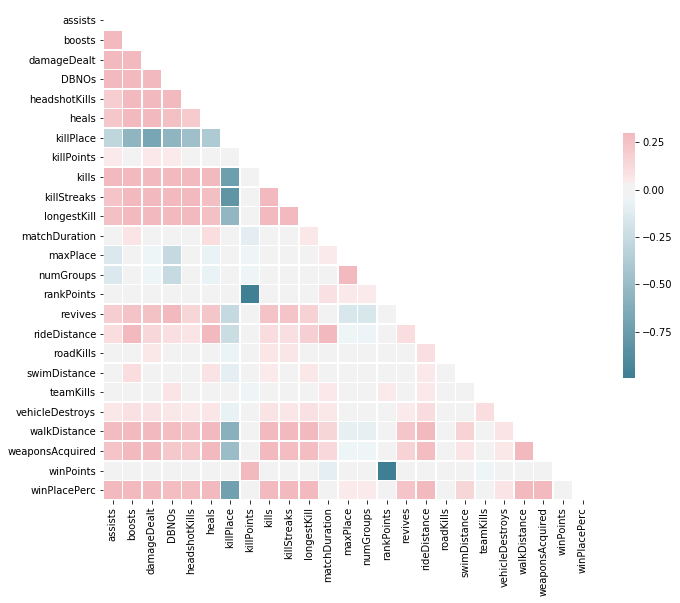

In [8]:
import numpy as np
import matplotlib.pyplot as plt
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
columns_drop = ['winPoints','rankPoints']
df1['rankwin_points'] = (df1['rankPoints']+df1['winPoints'])/(df1['rankPoints']-df1['winPoints'])
df1.drop(columns = columns_drop, inplace = True)


In [10]:
df_cpy = df1.copy(deep = True)

(array([479500., 476800., 472311., 471237., 469540., 468153., 465627.,
        463535., 449851., 230410.]),
 array([  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91., 101.]),
 <a list of 10 Patch objects>)

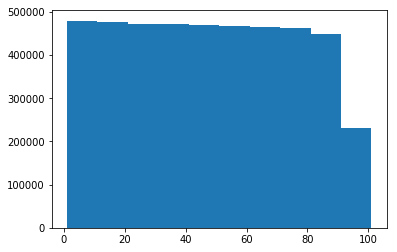

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(df_cpy["killPlace"], bins = 10)

In [12]:
df_cpy["killPlace"] = pd.qcut(df1["killPlace"], 10);
#df_cpy["walkDistance"] = pd.qcut(df1["walkDistance"], 10);
#df_cpy["damageDealt"] = pd.cut(df1["damageDealt"], 4);
#df_cpy.drop(columns = ['killPoints'], inplace = True)
df1.head();

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


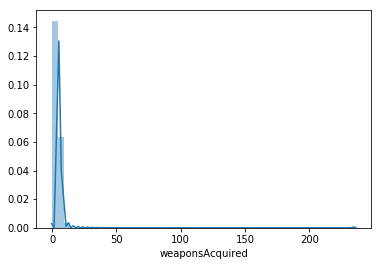

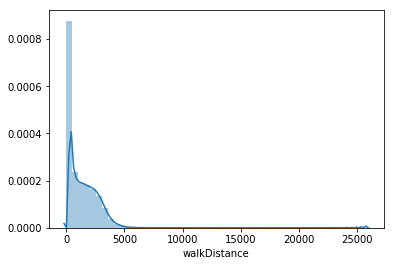

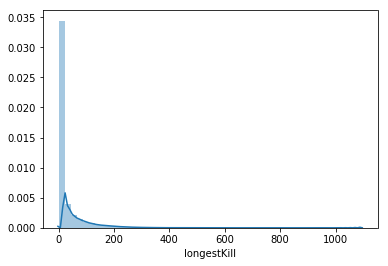

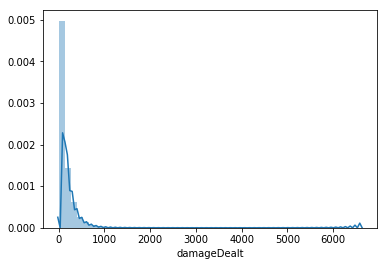

In [13]:
hist_cols = ['weaponsAcquired','walkDistance','longestKill','damageDealt']
i = 1
for col in hist_cols:
    plt.figure(i)
    sns.distplot(df1[col]);
    #plt.show()
    i+=1

In [14]:
weap_ind = df1['weaponsAcquired']<10
walk_ind = df1['walkDistance'] < 3000
long_ind = df1['longestKill'] <50
dam_ind = df1['damageDealt'] < 300

####  uncorrelated variables #####
killpoints_ind = df1['killPoints']<1000


In [15]:
matdur_ind1 = (df1['matchDuration'] >1000) &(df1['matchDuration'] <=1550)
matdur_ind2 = (df1['matchDuration'] >1550) &(df1['matchDuration'] <=2050)


In [ ]:
########### For other column outliers #########################
other_cols = [col for col in df_cpy.columns.values if col not in hist_cols]
i= 1
for col in other_cols:
    plt.figure(i)
    sns.distplot(df1[col]);
    plt.show()
    i+=1

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda

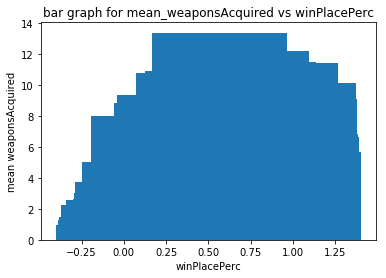

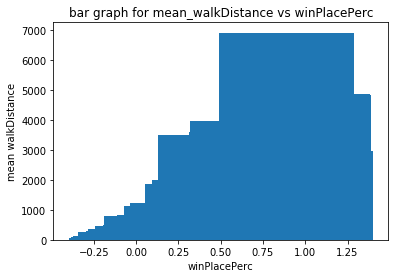

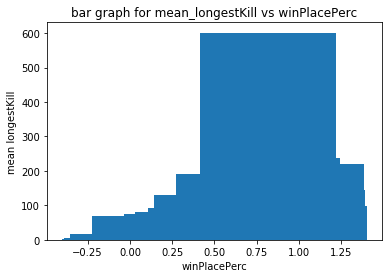

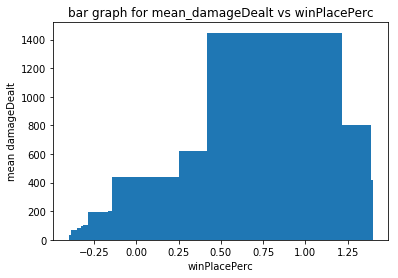

In [80]:
################## EDA for correlated columns w.r.t winpercent #############3
temp = {}
df_cpycpy = df_cpy.copy(deep = True)
df_cpycpy['bucketed_winPlacePerc'] = pd.cut(df_cpycpy['winPlacePerc'],10)
i = 1
for col in hist_cols:

    
    temp[col] = df_cpycpy.groupby(['winPlacePerc'])[col].mean()
    plt.figure(i)
    plt.bar(temp[col].index,temp[col].values)
    plt.xlabel('winPlacePerc')
    plt.ylabel('mean {}'.format(col))
    plt.title('bar graph for mean_{} vs winPlacePerc'.format(col))
    i+=1
   
    
    

In [81]:
df_cpy = df1.loc[weap_ind]
df_cpy = df_cpy.loc[walk_ind]
df_cpy = df_cpy.loc[long_ind]
df_cpy = df_cpy.loc[dam_ind]
df_cpy = df_cpy.loc[killpoints_ind]
df_cpy.loc[matdur_ind1,'matchDuration'] = 1500
df_cpy.loc[matdur_ind2,'matchDuration'] = 1800
df_cpy.reset_index(inplace = True, drop = True)

In [82]:
df_cpy['matchType'].value_counts()

squad-fpp           747584
duo-fpp             465095
squad               285530
solo-fpp            268205
duo                 154776
solo                 96263
crashfpp              5809
normal-squad-fpp      4138
flaretpp              1605
normal-duo-fpp         958
flarefpp               478
crashtpp               341
normal-solo-fpp        292
normal-squad           137
normal-solo             44
normal-duo              30
Name: matchType, dtype: int64

In [83]:
ind = df_cpy['matchType'].value_counts().index.tolist()[0:6]
df_cpy = df_cpy[df_cpy.matchType.isin(ind)]

In [84]:
ind

['squad-fpp', 'duo-fpp', 'squad', 'solo-fpp', 'duo', 'solo']

In [85]:

#cols_considered = ['weaponsAcquired','walkDistance','longestKill','killStreaks','kills','killPlace','winPlacePerc']
#df = df[cols_considered]
df = pd.get_dummies(df_cpy)

In [86]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X = df.drop(columns = ['winPlacePerc'])
y = df['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)




In [87]:
from sklearn.metrics import make_scorer,mean_absolute_error
mae = make_scorer(mean_absolute_error)
reg = linear_model.LinearRegression()
np.mean(cross_val_score(reg, X, y, cv=5,scoring=mae))

0.07459198237107864

In [88]:
df_cpy.shape

(2017453, 25)

In [89]:
0.07459198237107864
0.07506939932267001
0.07529680198684913
0.0813284577846906
0.08221428272345307
0.08232219849041483
0.08530501509194813

0.08530501509194813

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
np.mean(cross_val_score(rf, X, y, cv=2,scoring=mae))

0.0565326107599967

In [91]:
0.0565326107599967
0.056918555240271354
0.05815617775788847
0.06619819991022098

0.06619819991022098

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
np.mean(cross_val_score(gbm, X, y, cv=5,scoring=mae))

In [42]:
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

def baseline_model():
    model = Sequential()
    model.add(layers.Dense(200, activation = "sigmoid", input_shape=(X.shape[1], )))

    # Hidden - Layers
    model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
    model.add(layers.Dense(175, activation = "sigmoid"))
    model.add(layers.Dropout(0.25, noise_shape=None, seed=None))
    model.add(layers.Dense(150, activation = "sigmoid"))
    model.add(layers.Dropout(0.25, noise_shape=None, seed=None))
    model.add(layers.Dense(125, activation = "sigmoid"))


    # Output- Layer
    model.add(layers.Dense(1, activation = "sigmoid"))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model
#estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=1024, verbose=2)
#results = cross_val_score(estimator, X, y, cv=2)
model = baseline_model()
model.fit(X_train, y_train,epochs= 100,batch_size = 2048,  validation_data = (X_test, y_test),callbacks=callbacks)


Train on 1997278 samples, validate on 20175 samples
Epoch 1/100
1997278/1997278 [==============================] - 28s 14us/step - loss: 0.1024 - val_loss: 0.0840
Epoch 2/100
1997278/1997278 [==============================] - 27s 13us/step - loss: 0.0873 - val_loss: 0.0750
Epoch 3/100
1997278/1997278 [==============================] - 27s 14us/step - loss: 0.0819 - val_loss: 0.0722
Epoch 4/100
1997278/1997278 [==============================] - 27s 14us/step - loss: 0.0781 - val_loss: 0.0712
Epoch 5/100
1997278/1997278 [==============================] - 28s 14us/step - loss: 0.0754 - val_loss: 0.0658
Epoch 6/100
1997278/1997278 [==============================] - 27s 13us/step - loss: 0.0730 - val_loss: 0.0629
Epoch 7/100
1997278/1997278 [==============================] - 27s 13us/step - loss: 0.0713 - val_loss: 0.0616
Epoch 8/100
1997278/1997278 [==============================] - 27s 13us/step - loss: 0.0698 - val_loss: 0.0623
Epoch 9/100
1997278/1997278 [==============================]

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 533, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 70, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 237, 274, 311, 348, 385, 422, 459, 496, 533], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1,scoring = mae)

# Fit the random search model
rf_random.fit(X, y)

In [ ]:
rf_random.best_params_

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators =200,min_samples_split = 2, min_samples_leaf = 4,
                          max_features = 'sqrt',max_depth = 20,bootstrap = True,random_state = 0)
cross_val_score(rf, X, y, cv=2,scoring=mae)

array([0.05668811, 0.05666383])

In [30]:
np.mean([0.05668811, 0.05666383])

0.05667597